## Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import random
import math
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
from keras.regularizers import l2


from keras.layers import Dropout
import warnings
warnings.filterwarnings('ignore')


## Split into Train and Test sets

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
print('number of images : ', x_train.shape[0]) 
print('Dimensions of X: ', x_train.shape[1], 'x', x_train.shape[2])

number of images :  60000
Dimensions of X:  28 x 28


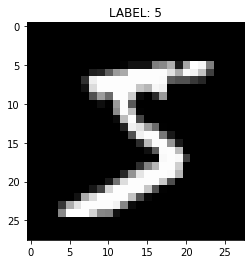

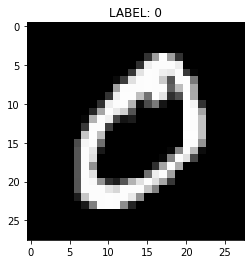

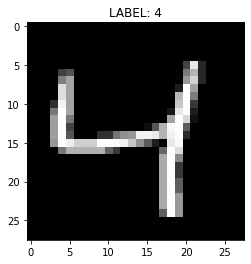

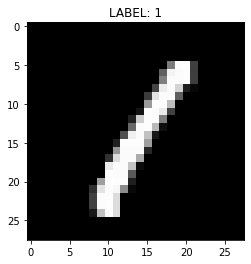

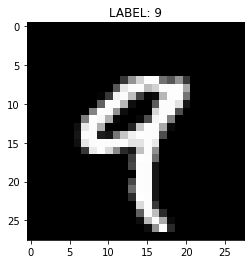

In [6]:
for i in range(5): 
    plt.title('LABEL: {label}'.format(label=y_train[i]))
    plt.imshow(x_train[i], cmap='gray')
    plt.show()

## Neural Network

In [14]:
# 28x28 = 784
model = Sequential([Dense(50, input_shape=(784,), kernel_regularizer=l2(.005)), 
                       Activation('relu'),
                       Dense(30),
                       Activation('relu'),
                       Dense(30),
                       Activation('relu'),
                       Dense(10),
                       Activation('softmax'),
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Re-format data to 1-hot encoding, unroll the data

In [8]:
y_train_hot = keras.utils.to_categorical(y_train, num_classes=10)

#test if one-hot worked, should have a one in the 6th place to represent 5
#y_train_hot[0]

x_train_unroll = x_train.reshape(60000, 784)
x_test_unroll = x_test.reshape(10000, 784)

## Train neural network with training data, 10 iterations through entire dataset

In [15]:
model.fit(x_train_unroll, y_train_hot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 1.4529 - accuracy: 0.7063
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5380 - accuracy: 0.9057
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4059 - accuracy: 0.9262
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3480 - accuracy: 0.9355
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3218 - accuracy: 0.9412
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3040 - accuracy: 0.9437
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9475
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2760 - accuracy: 0.9483
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.9495
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.257

## Use model to make predictions

In [10]:
prediction_hot = model.predict(x_test_unroll)
prediction = []

#convert from one-hot to regular
for line in prediction_hot:
    prediction.append(np.argmax(line))

313/313 [==============================] - 0s 853us/step


View predictions and labels

## pick random pictures

PREDICTION:  8


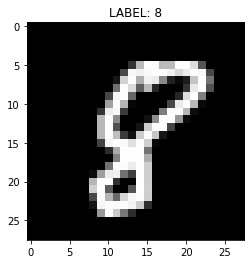

PREDICTION:  6


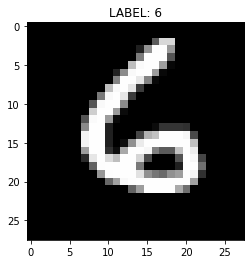

PREDICTION:  5


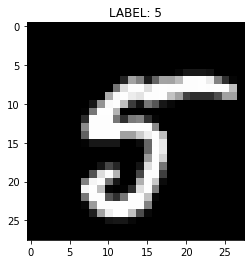

PREDICTION:  9


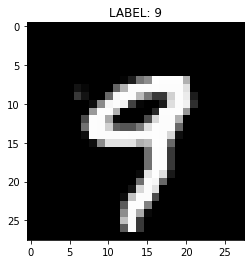

PREDICTION:  7


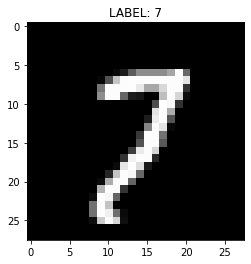

In [11]:

num = math.ceil(random.uniform(1,9995))
for i in range(num, num+5):
    print('PREDICTION: ', prediction[i])
    plt.title('LABEL: {label}'.format(label=y_test[i]))
    plt.imshow(x_test[i], cmap='gray')
    plt.show()

In [16]:
correct = 0
incorrect = 0

for i in prediction:
    if prediction[i] == y_test[i]:
        correct += 1
    else:
        incorrect += 1

accuracy = correct / y_test.shape[0]

print(correct)
print('Test Prediction Accuracy: ', accuracy * 100, '%')

10000
Test Prediction Accuracy:  100.0 %


PREDICTION:  6


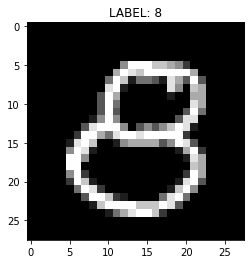

PREDICTION:  6


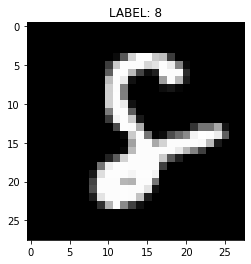

In [17]:
#Inspect data when prediction=6 and label=5
label_miss = 8
prediction_miss = 6
for i in range(10000):
    if prediction[i] == prediction_miss and y_test[i] == label_miss:
        print('PREDICTION: ', prediction[i])
        plt.title('LABEL: {label}'.format(label=y_test[i]))
        plt.imshow(x_test[i], cmap='gray')
        plt.show()

In [2]:
# end